# Tutorial 8 - Data Analysis with pandas


*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

---
**This tutorial will cover:**
 - pandas library for analyzing spreadsheet format data  - DataFrames

 - visualizing data from pandas

 - combining pnadas and numpy

**Resources:**

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

https://www.dataquest.io/blog/pandas-cheat-sheet/

https://www.datasciencecentral.com/data-science-in-python-pandas-cheat-sheet/

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

download worldcities.csv from moodle, than upload it from your local drive

original source of dataset
https://www.kaggle.com/datasets/juanmah/world-cities

next cell for colab only:

In [ ]:
from google.colab import files

uploaded = files.upload()

load data to workspace (same as working locally - given file is in working folder)

In [ ]:
data = pd.read_csv("worldcities (1).csv")

In [ ]:
data

## explore dataset
Dataset column names

In [ ]:
list(data)

unique values in a column

In [ ]:
data["capital"].unique()

how many countries are included in the dataset?

In [ ]:
len(data["country"].unique())

## overall descriptive statistics
explore the data-set proprerties with pandas summary features



In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
data.corr()

In [ ]:
data.count()

## visulize all cities by latitude and longitude with a scatter plot!

In [ ]:
plt.scatter(data["lng"], data["lat"], alpha=0.1)

In [ ]:
plt.scatter(data["lng"], data["lat"], alpha=0.05)  # c=data['population'])

## sorting the values to see which are the southermost and  northernmost cities

.sort_values()



In [ ]:
data.sort_values("lat")

! changing original table vs new table

inplace argument

In [ ]:
sorted_lat = data.sort_values("lat")
sorted_lat

In [ ]:
data.sort_values("lat", inplace=True)

In [ ]:
data.sort_values("population", inplace=True, ascending=False)

In [ ]:
data

## searching and indexing the dataset

how many towns/cities are in Austria in this dataset?

What is the average population of cities in Austria?

Num of cities in southern vs northern hemisphere?


In [ ]:
np.sum(data["country"] == "Austria")

In [ ]:
austrian_cities = data["city"][data["country"] == "Austria"]

In [ ]:
plt.scatter(
    data["lng"][data["country"] == "Austria"],
    data["lat"][data["country"] == "Austria"],
    alpha=0.8,
)  # c=data['population'])

In [ ]:
data["population"][data["country"] == "Austria"].mean()

In [ ]:
np.mean(data["population"][data["country"] == "Austria"])

In [ ]:
np.median(data["population"][data["country"] == "Austria"])

In [ ]:
np.sum(data["lat"] > 0)

In [ ]:
np.sum(data["lat"] < 0)

In [ ]:
np.sum(data["lng"] < 0)

In [ ]:
np.sum(data["lng"] > 0)

In [ ]:
data[(data["country"] == "Austria") & (data["population"] > 100000)]

In [ ]:
data["city"][(data["country"] == "Austria") & (data["population"] > 100000)]

In [ ]:
data[data["country"] == "Austria"]

In [ ]:
data["city"][data["country"] == "Austria"].to_numpy()

indexing a columns vs the whole table

## data cleaning -
how many cities do not have a population listed   -isna()

drop all cities from the dataframe without population

NaN indicates missing values


In [ ]:
np.sum(data["population"].isna())

In [ ]:
np.sum(np.isnan(data["population"]))

In [ ]:
data[data["population"].isna() == False]

In [ ]:
data[np.isnan(data["population"])]

In [ ]:
data_cleaned = data[data["population"].isna() == False]

In [ ]:
data_cleaned.shape

drop too small cities that have a really small population (eg <1000)


In [ ]:
data_cleaned = data_cleaned[data_cleaned["population"] > 1000]

In [ ]:
data_cleaned.shape

In [ ]:
data_cleaned = data[data["population"] > 1000]  # .shape

## visualize the primary capitals by location
make the scatter plot markers proportional to the population


In [ ]:
plt.scatter(
    data["lng"][data["capital"] == "primary"], data["lat"][data["capital"] == "primary"]
)

In [ ]:
idx = data["capital"] == "primary"
plt.scatter(data["lng"][idx], data["lat"][idx], s=data["population"][idx] / 100000)

## adding name for capitals over 10 000 000
idxs = np.nonzero(data["capital"].to_numpy() == "primary")[0]
for i in idxs:
    if data["population"][i] > 1e7:
        plt.text(data["lng"][i], data["lat"][i], data["city"][i])

## Combined data analysis with numpy

1. use a for loop to access each country individually, count the number of cities and their average population,
2. store the results  in a 2d numpy array, with a column for number of cities, add a column for average population,
3. add a 3rd column for the median population of cities
4. add 4th column for the total city dwelling population



In [ ]:
countries = np.sort(data_cleaned["country"].unique())
print(countries)

In [ ]:
## your code
## your code

## making a new dataframe from the results of the above analysis

In [ ]:
analysis_df = pd.DataFrame(
    analysis,
    columns=[
        "num cities",
        "mean city population",
        "median city population",
        "total city population",
    ],
)
analysis_df["country"] = countries
analysis_df

In [ ]:
print("Largest number of entries", np.max(analysis[:, 0]))
countries[np.argmax(analysis[:, 0])]

In [ ]:
print("smallest number of entries", np.min(analysis[:, 0]))

countries[np.argmin(analysis[:, 0])]

In [ ]:
print("Largest average size", np.max(analysis[:, 1]))
countries[np.argmax(analysis[:, 1])]

In [ ]:
print("Smallest average size", np.min(analysis[:, 1]))
countries[np.argmin(analysis[:, 1])]

In [ ]:
analysis[countries == "China", 0]

## Task
1.  find largest city of each latitude in bins of 10 degrees
2.  find median city of size  each longitude in bins of 10 degrees
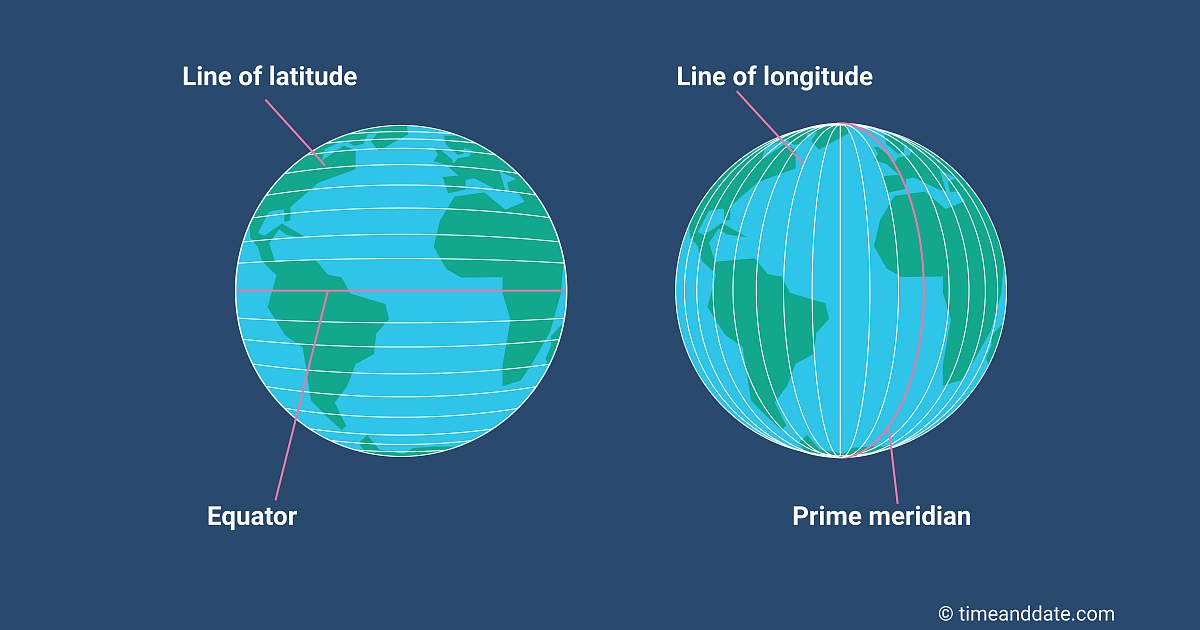

indexing a pandas dataframe numpy style:
iloc